<a href="https://colab.research.google.com/github/uervitonsantos/Exercicios_Metodos_Quantitativos/blob/main/Avalia%C3%A7%C3%A3o_M%C3%A9todos_Quantitativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Metodos Quantitativos

In [ ]:
# rpy2 fornece uma interface que permite executar R em processos Python.
!pip install rpy2

In [2]:
%load_ext rpy2.ipython

In [ ]:
%%R
# install e chamada dos pacotes necessarios para o analise dos dados
if(!require(tidyverse))
install.packages("tidyverse")
if(!require(RVAideMemoire))
install.packages("nortest")
if(!require(psych))
install.packages("psych")
if(!require(rstatix))
install.packages("rstatix")
if(!require(car))
install.packages("car")
if(!require(DescTools))
install.packages("DescTools")
if(!require(reshape))
install.packages("reshape")
if(!require(PMCMRplus))
install.packages("PMCMRplus")

In [165]:
%%R
library(dplyr)
library(tidyverse)
library(tidyr)
library(ggplot2)
library(nortest)
library(psych)
library(rstatix)
library(car)
library(reshape)
#library(PMCMRplus)
library(DescTools)

# 1. (1,0 ponto) A temperatura de deformação sob carga de duas formulações diferentes de tubos plásticos está sendo estudada. Duas amostras de 12 observações são preparadas usando cada formulação, as temperaturas de deformação (em °F) são relatadas a seguir:

a) Os dados apoiam a alegação de que a temperatura média de deformação sob carga para a formulação 1 é
maior que a da formulação 2? Use α = 0,05.

In [5]:
%%R
# construção das listas com os valores para cada grupo
FORMULACAO_1 <- c(212, 199, 198, 194, 213, 216, 211, 191, 200, 193, 195, 184)
FORMULACAO_2 <- c(177, 176, 198, 197, 185, 188, 206, 200, 189, 201, 197, 203)

# montando um dataFrame com os grupos selecionados
FORMULACAO <- data.frame(FORMULACAO_1, FORMULACAO_2)

#str é uma função para verificar os tipos de dados de cada grupos
str(FORMULACAO)

'data.frame':	12 obs. of  2 variables:
 $ FORMULACAO_1: num  212 199 198 194 213 216 211 191 200 193 ...
 $ FORMULACAO_2: num  177 176 198 197 185 188 206 200 189 201 ...


##Hipóteses:

H0: Os grupos possuem distribuição normal

H1: Os grupos possuem não distribuição normal

In [6]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
shapiro_1 <- shapiro.test(FORMULACAO_1)
shapiro_2 <- shapiro.test(FORMULACAO_2)

In [7]:
%%R
# resultado do test de shapiro-wilk para o grupo FORMULACAO_1
shapiro_1


	Shapiro-Wilk normality test

data:  FORMULACAO_1
W = 0.92643, p-value = 0.3438



In [8]:
%%R
# resultado do test de shapiro-wilk para o grupo FORMULACAO_2
shapiro_2


	Shapiro-Wilk normality test

data:  FORMULACAO_2
W = 0.91474, p-value = 0.2453



Podemos observar com o teste de shapiro-wilk que ambos os grupos possuem distribuição normal como p > 0,5

In [9]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
col_form <- FORMULACAO %>% pivot_longer(cols = everything(), names_to = "formulacao")
col_form

# A tibble: 24 × 2
   formulacao   value
   <chr>        <dbl>
 1 FORMULACAO_1   212
 2 FORMULACAO_2   177
 3 FORMULACAO_1   199
 4 FORMULACAO_2   176
 5 FORMULACAO_1   198
 6 FORMULACAO_2   198
 7 FORMULACAO_1   194
 8 FORMULACAO_2   197
 9 FORMULACAO_1   213
10 FORMULACAO_2   185
# … with 14 more rows
# ℹ Use `print(n = ...)` to see more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


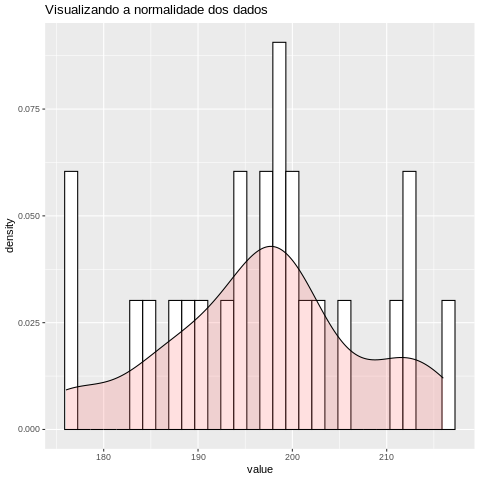

In [10]:
%%R
ggplot(col_form, aes(x=value)) + geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") + ggtitle("Visualizando a normalidade dos dados")

In [11]:
%%R
# teste de Levene para verificar a homogeneidade de variancias
# https://pt.wikipedia.org/wiki/Teste_de_Levene
leveneTest(value ~ formulacao, data = col_form, center=mean)

Levene's Test for Homogeneity of Variance (center = mean)
      Df F value Pr(>F)
group  1  0.0012 0.9731
      22               


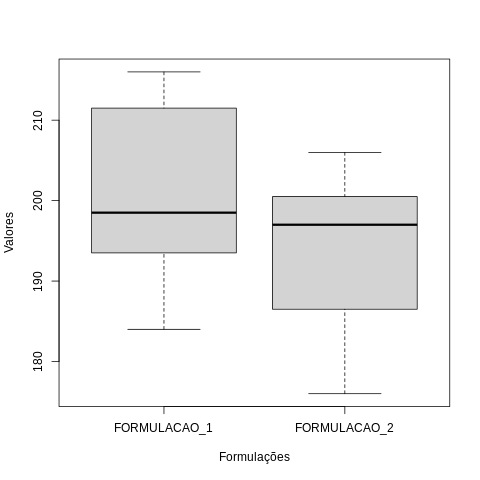

In [12]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ formulacao, data = col_form, ylab="Valores", xlab="Formulações")

In [13]:
%%R
# Para comparar a média de cada um desses dois grupos, usamos a função t.test().
# http://rstudio-pubs-static.s3.amazonaws.com/408638_6679293d4c7a415eaebe00faa3aea0cb.html
t.test(FORMULACAO_1, FORMULACAO_2, conf.level  = 0.95)


	Welch Two Sample t-test

data:  FORMULACAO_1 and FORMULACAO_2
t = 1.8053, df = 21.989, p-value = 0.08474
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.103683 15.937016
sample estimates:
mean of x mean of y 
 200.5000  193.0833 



O teste-t para as duas amostras (Formulação 1 e Formulaçao 2), mostrou que há diferença entre as médias com (t(22) = 1.81; P = 0.08473). Portanto podemos rejeitar a H1

# 2. (1,0 ponto) O fabricante de um produto está investigando a resistência à ruptura de uma nova fibra sintética, que será utilizada para confecção de camisas de uso masculino. A resistência é geralmente afetada pela porcentagem de algodão usado na mistura de materiais para a fibra. O fabricante realizou um experimento com cinco níveis do conteúdo de algodão e reproduziu o experimento cinco vezes. Os dados estão apresentados na tabela a seguir.

a) Há evidências para apoiar a alegação de que a porcentagem de algodão afeta a média de resistência da nova
fibra? Use α = 0,05.

b) Se necessário, faça comparações entre os pares de médias. Que conclusões você pode tirar?

In [14]:
%%R
# construção das listas com os valores para cada grupo
Algodao_15 <- c(7,7,15,11,9)
Algodao_20 <- c(12,17,12,18,18)
Algodao_25 <- c(14,19,19,18,18)
Algodao_30 <- c(19,25,22,19,23)
Algodao_35 <- c(7,10,11,15,11)

# montando um dataFrame com os grupos selecionados
algodao <- data.frame(Algodao_15, Algodao_20, Algodao_25, Algodao_30, Algodao_35)

#str é uma função para verificar os tipos de dados de cada grupos
str(algodao)

'data.frame':	5 obs. of  5 variables:
 $ Algodao_15: num  7 7 15 11 9
 $ Algodao_20: num  12 17 12 18 18
 $ Algodao_25: num  14 19 19 18 18
 $ Algodao_30: num  19 25 22 19 23
 $ Algodao_35: num  7 10 11 15 11


In [15]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
shapiro_a_15 <- shapiro.test(Algodao_15)
shapiro_a_20 <- shapiro.test(Algodao_20)
shapiro_a_25 <- shapiro.test(Algodao_25)
shapiro_a_30 <- shapiro.test(Algodao_30)
shapiro_a_35 <- shapiro.test(Algodao_35)

In [16]:
%%R
# resultado do test de shapiro-wilk para o grupo Algodao_15
shapiro_a_15


	Shapiro-Wilk normality test

data:  Algodao_15
W = 0.88104, p-value = 0.314



In [17]:
%%R
# resultado do test de shapiro-wilk para o grupo Algodao_20
shapiro_a_20


	Shapiro-Wilk normality test

data:  Algodao_20
W = 0.75383, p-value = 0.03228



In [18]:
%%R
# resultado do test de shapiro-wilk para o grupo Algodao_25
shapiro_a_25


	Shapiro-Wilk normality test

data:  Algodao_25
W = 0.73872, p-value = 0.02332



In [19]:
%%R
# resultado do test de shapiro-wilk para o grupo Algodao_30
shapiro_a_30


	Shapiro-Wilk normality test

data:  Algodao_30
W = 0.90202, p-value = 0.4211



In [20]:
%%R
# resultado do test de shapiro-wilk para o grupo Algodao_35
shapiro_a_35


	Shapiro-Wilk normality test

data:  Algodao_35
W = 0.94197, p-value = 0.6799



Podemos observar com o teste de shapiro-wilk que os grupos NÂO possue distribuição normal como p > 0.05

In [21]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
algodao <- algodao %>% pivot_longer(cols = everything(), names_to = "algodao")
algodao

# A tibble: 25 × 2
   algodao    value
   <chr>      <dbl>
 1 Algodao_15     7
 2 Algodao_20    12
 3 Algodao_25    14
 4 Algodao_30    19
 5 Algodao_35     7
 6 Algodao_15     7
 7 Algodao_20    17
 8 Algodao_25    19
 9 Algodao_30    25
10 Algodao_35    10
# … with 15 more rows
# ℹ Use `print(n = ...)` to see more rows


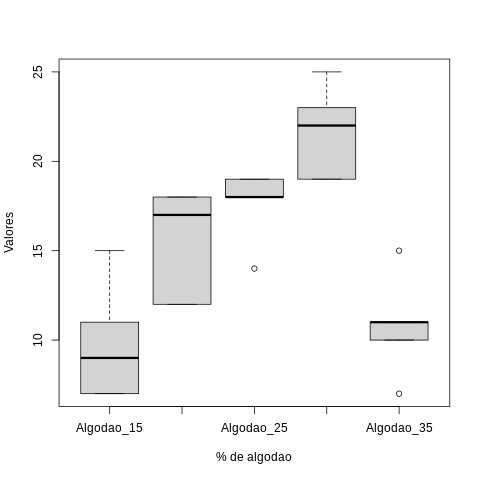

In [62]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ algodao, data = algodao, ylab="Valores", xlab="% de algodao")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


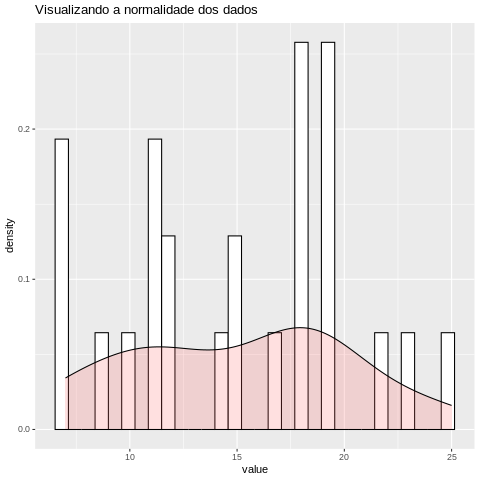

In [64]:
%%R
# Grafico para mostra a distribuição dos dados
ggplot(algodao, aes(x=value)) + geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") + ggtitle("Visualizando a normalidade dos dados")

In [63]:
%%R
# Teste de Kruskal-Wallis que nos mostra se há diferença entre os grupos
kruskal_algodao <- kruskal.test(value ~ algodao, data = algodao)
kruskal_algodao


	Kruskal-Wallis rank sum test

data:  value by algodao
Kruskal-Wallis chi-squared = 19.064, df = 4, p-value = 0.0007636



O teste de Kruskal-Wallis nos mostra um resultado de p-value = 0.0007636
Sendo assim, devemos rejeitar a H0, que nos diz que a mediana dos grupos são iguis e aceitar a H1 que nos diz que pelo menos um dos grupos tem um mediana diferente.

In [40]:
%%R
# teste de Dunn para análizar entre quais grupos existe as maiores variâncias
# https://rdrr.io/cran/rstatix/man/dunn_test.html
dunn_algodao <- dunn_test(value ~ algodao, data = algodao, p.adjust.method = "bonferroni")
dunn_algodao

# A tibble: 10 × 9
   .y.   group1     group2        n1    n2 statistic        p   p.adj p.adj.si…¹
 * <chr> <chr>      <chr>      <int> <int>     <dbl>    <dbl>   <dbl> <chr>     
 1 value Algodao_15 Algodao_20     5     5     1.66  0.0961   0.961   ns        
 2 value Algodao_15 Algodao_25     5     5     2.48  0.0130   0.130   ns        
 3 value Algodao_15 Algodao_30     5     5     3.70  0.000220 0.00220 **        
 4 value Algodao_15 Algodao_35     5     5     0.259 0.795    1       ns        
 5 value Algodao_20 Algodao_25     5     5     0.821 0.412    1       ns        
 6 value Algodao_20 Algodao_30     5     5     2.03  0.0422   0.422   ns        
 7 value Algodao_20 Algodao_35     5     5    -1.40  0.160    1       ns        
 8 value Algodao_25 Algodao_30     5     5     1.21  0.226    1       ns        
 9 value Algodao_25 Algodao_35     5     5    -2.23  0.0260   0.260   ns        
10 value Algodao_30 Algodao_35     5     5    -3.44  0.000591 0.00591 **        
# … with 

O teste de DUNN nos mostrando que há deferenças entre os grupos.
O teste mostrou que há diferenças significativas entre a amostra de Algodão (15 - 30), (30 -25)

# 3. (2,0 pontos) A resistência à tração do cimento Portland está sendo estudada. Quatro diferentes técnicas de mistura foram usadas e os seguintes dados coletados:

a) Avalie se os pressupostos para a análise de variância são satisfeitos.

b) Teste a hipótese de que a técnica de mistura afeta a resistência do cimento. Use α = 0,05 e justifique a
escolha da técnica utilizada (ANOVA ou Kruskal-Wallis).

c) Se necessário, faça um teste de comparações múltiplas.

In [75]:
%%R
# construção das listas com os valores para cada grupo
mistura_1 <- c(3129, 3000, 2865, 2890)
mistura_2 <- c(3200, 3300, 2975, 3150)
mistura_3 <- c(2800, 2900, 2985, 3050)
mistura_4 <- c(2600, 2700, 2600, 2765)

# montando um dataFrame com os grupos selecionados
mistura <- data.frame(mistura_1, mistura_2, mistura_3, mistura_4)

#str é uma função para verificar os tipos de dados de cada grupos
str(mistura)

'data.frame':	4 obs. of  4 variables:
 $ mistura_1: num  3129 3000 2865 2890
 $ mistura_2: num  3200 3300 2975 3150
 $ mistura_3: num  2800 2900 2985 3050
 $ mistura_4: num  2600 2700 2600 2765


In [76]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
shapiro_mistura_1 <- shapiro.test(mistura_1)
shapiro_mistura_2 <- shapiro.test(mistura_2)
shapiro_mistura_3 <- shapiro.test(mistura_3)
shapiro_mistura_4 <- shapiro.test(mistura_4)

In [77]:
%%R
# resultado do test de shapiro-wilk para o grupo mistura_1
shapiro_mistura_1


	Shapiro-Wilk normality test

data:  mistura_1
W = 0.91496, p-value = 0.5091



In [78]:
%%R
# resultado do test de shapiro-wilk para o grupo mistura_2
shapiro_mistura_2


	Shapiro-Wilk normality test

data:  mistura_2
W = 0.96765, p-value = 0.8269



In [79]:
%%R
# resultado do test de shapiro-wilk para o grupo mistura_3
shapiro_mistura_3


	Shapiro-Wilk normality test

data:  mistura_3
W = 0.98323, p-value = 0.9207



In [80]:
%%R
# resultado do test de shapiro-wilk para o grupo mistura_4
shapiro_mistura_4


	Shapiro-Wilk normality test

data:  mistura_4
W = 0.85966, p-value = 0.259



Podemos observar com o teste de shapiro-wilk que pelo nemos um dos grupos NÂO possue distribuição normal como p > 0,5

In [81]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
mistura <- mistura %>% pivot_longer(cols = everything(), names_to = "mistura")
mistura

# A tibble: 16 × 2
   mistura   value
   <chr>     <dbl>
 1 mistura_1  3129
 2 mistura_2  3200
 3 mistura_3  2800
 4 mistura_4  2600
 5 mistura_1  3000
 6 mistura_2  3300
 7 mistura_3  2900
 8 mistura_4  2700
 9 mistura_1  2865
10 mistura_2  2975
11 mistura_3  2985
12 mistura_4  2600
13 mistura_1  2890
14 mistura_2  3150
15 mistura_3  3050
16 mistura_4  2765


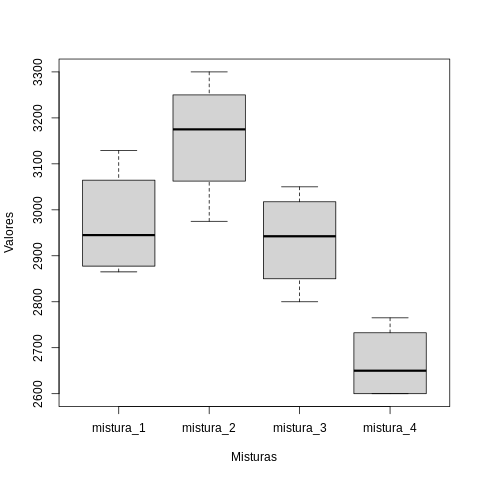

In [82]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ mistura, data = mistura, ylab="Valores", xlab="Misturas")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


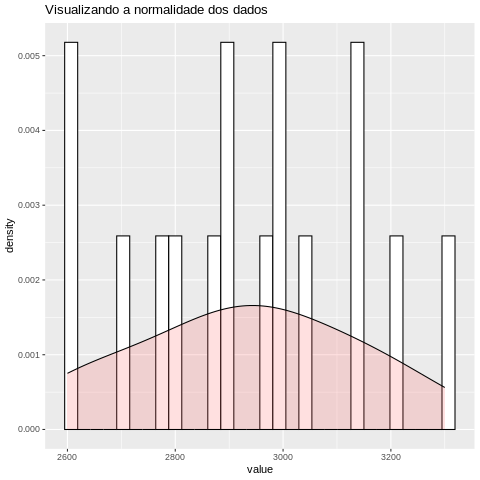

In [83]:
%%R
# Grafico para mostrar a distribuição dos dados
ggplot(mistura, aes(x=value)) + geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") + ggtitle("Visualizando a normalidade dos dados")

In [84]:
%%R
# Teste de Kruskal-Wallis que nos mostra se há diferença entre os grupos
kruskal_mistura <- kruskal.test(value ~ mistura, data = mistura)
kruskal_mistura


	Kruskal-Wallis rank sum test

data:  value by mistura
Kruskal-Wallis chi-squared = 10.891, df = 3, p-value = 0.01233



O teste de Kruskal-Wallis nos mostra um resultado de p-value = 0.01233
Sendo assim, devemos rejeitar a H0, que nos diz que a mediana dos grupos são iguais e aceitar a H1 que nos diz que pelo menos um dos grupos tem um mediana diferente.

In [65]:
%%R
# teste de Dunn para análizar entre quais grupos existe as maiores variâncias
# https://rdrr.io/cran/rstatix/man/dunn_test.html
dunn_mistura <- dunn_test(value ~ mistura, data = mistura, p.adjust.method = "bonferroni")
dunn_mistura

# A tibble: 6 × 9
  .y.   group1    group2       n1    n2 statistic       p   p.adj p.adj.signif
* <chr> <chr>     <chr>     <int> <int>     <dbl>   <dbl>   <dbl> <chr>       
1 value mistura_1 mistura_2     4     4     1.26  0.206   1       ns          
2 value mistura_1 mistura_3     4     4    -0.149 0.882   1       ns          
3 value mistura_1 mistura_4     4     4    -2.01  0.0448  0.269   ns          
4 value mistura_2 mistura_3     4     4    -1.41  0.158   0.948   ns          
5 value mistura_2 mistura_4     4     4    -3.27  0.00108 0.00646 **          
6 value mistura_3 mistura_4     4     4    -1.86  0.0632  0.379   ns          


O teste de DUNN nos mostrando que há diferenças entre os grupos.
O teste mostrou que há diferenças significativas entre a amostra (mistura_2 mistura_4)

# 4. (1,0 ponto) Em um teste com um tipo de fusível, 9 peças foram testadas com 25% de sobrecarga. O tempo médio até queimar dessa amostra foi x = 19,2 minutos, com desvio-padrão populacional conhecido = 2,4 minutos. Sabendo que a população é normal calcule o intervalo de confiança 95% para a média μ da população.

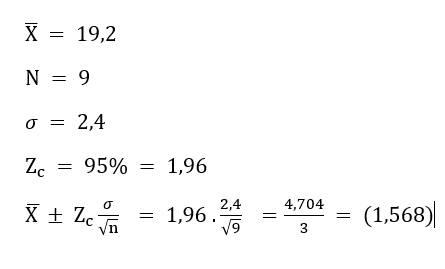

# 5. (1,0 ponto) A eficácia da publicidade de duas marcas rivais de café foi comparada. Os participantes avaliaram anúncios das duas marcas e classificaram a probabilidade geral de comprar o produto (de 0 a 10, com 10 sendo "definitivamente vai comprar" o produto"). Metade dos participantes deu notas para um dos produtos, a outra metade deu classificações para o outro produto.

Determine o teste a ser usado para verificar se existe diferença entre os dois grupos, realize o teste escolhido com 95% de confiança e discuta o significado dos resultados.

In [85]:
%%R
# construção das listas com os valores para cada grupo
marca_a <- c(3, 4, 2, 6, 2, 5)
marca_b <- c(9, 7, 5, 10, 6, 8)

# montando um dataFrame com os grupos selecionados
marca <- data.frame(marca_a, marca_b)

#str é uma função para verificar os tipos de dados de cada grupos
str(marca)

'data.frame':	6 obs. of  2 variables:
 $ marca_a: num  3 4 2 6 2 5
 $ marca_b: num  9 7 5 10 6 8


In [86]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
shapiro_marca_a <- shapiro.test(marca_a)
shapiro_marca_b <- shapiro.test(marca_b)

In [87]:
%%R
# resultado do test de shapiro-wilk para o grupo marca_a
shapiro_marca_a


	Shapiro-Wilk normality test

data:  marca_a
W = 0.91994, p-value = 0.505



In [88]:
%%R
# resultado do test de shapiro-wilk para o grupo marca_b
shapiro_marca_b


	Shapiro-Wilk normality test

data:  marca_b
W = 0.98189, p-value = 0.9606



In [90]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
marca <- marca %>% pivot_longer(cols = everything(), names_to = "marcas")
marca

# A tibble: 12 × 2
   marcas  value
   <chr>   <dbl>
 1 marca_a     3
 2 marca_b     9
 3 marca_a     4
 4 marca_b     7
 5 marca_a     2
 6 marca_b     5
 7 marca_a     6
 8 marca_b    10
 9 marca_a     2
10 marca_b     6
11 marca_a     5
12 marca_b     8


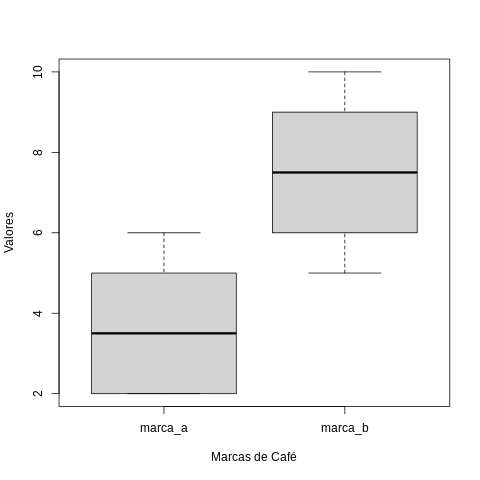

In [91]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~ marcas, data = marca, ylab="Valores", xlab="Marcas de Café")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


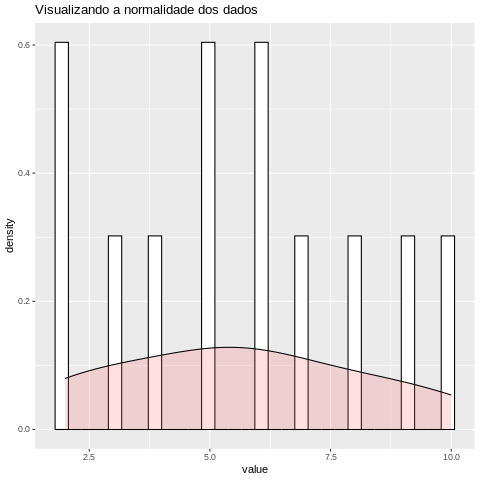

In [96]:
%%R
# Grafico para mostrar a distribuição dos dados
ggplot(marca, aes(x=value)) + geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") + ggtitle("Visualizando a normalidade dos dados")

##Hipóteses:

H0: As duas amostras tem medianas iguais

H1: As amostras tem medianas diferentes

In [101]:

%%R
# teste de Levene para verificar a homogeneidade de variancias
# https://pt.wikipedia.org/wiki/Teste_de_Levene
leveneTest(value ~ marcas, data = marca, center=mean)

Levene's Test for Homogeneity of Variance (center = mean)
      Df F value Pr(>F)
group  1   0.125  0.731
      10               


In [104]:
# teste ANOVA para análisar a variância entre os grupos
# https://pt.wikipedia.org/wiki/An%C3%A1lise_de_vari%C3%A2ncia
%%R
anova_marca <- aov(value ~ marcas, data = marca)
summary(anova_marca)

            Df Sum Sq Mean Sq F value Pr(>F)   
marcas       1  44.08   44.08    14.3 0.0036 **
Residuals   10  30.83    3.08                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


O teste da ANOVA que NÂO há diferença significativa entre as medias das amostras.
Com isso, podemos aceitar a H1

In [106]:
%%R
# teste de tukey para análizar entre quais grupos existe as maiores variâncias
# https://en.wikipedia.org/wiki/Tukey's_range_test
TUKEY <- TukeyHSD(x=anova_marca, "marcas", conf.level=0.95, ordered = TRUE)
TUKEY

  Tukey multiple comparisons of means
    95% family-wise confidence level
    factor levels have been ordered

Fit: aov(formula = value ~ marcas, data = marca)

$marcas
                    diff     lwr      upr    p adj
marca_b-marca_a 3.833333 1.57446 6.092207 0.003595



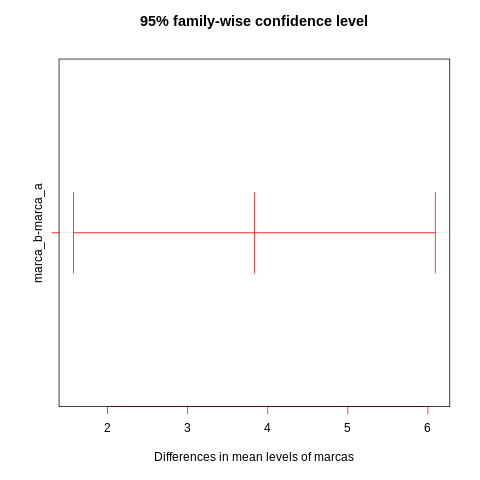

In [107]:
%%R
# grafico do teste de tuket que demostra as variâncias entre os grupos
# https://r-graph-gallery.com/84-tukey-test.html
plot(TUKEY, las=0, col="red")

# 6. (1,0 ponto) Os dados a seguir indicam a soma de notas obtidas por um grupo de alunos, homens e mulheres, do curso de engenharia. Use o teste de Mann-Whitney para determinar se os valores diferem entre homens e mulheres.Investigue se os empates observados interferem no resultado.

In [118]:
# %%R
# # construção das listas com os valores para cada grupo
# homens <- data.frame(data=c(8, 6, 4, 2, 10, 5, 6, 6, 19, 4, 10, 4, 10, 12, 7, 2, 5, 1, 8, 2, 0, 7, 6, 4, 4, 11, 2, 16, 8, 7, 8, 4, 0, 2))   
# mulheres <- data.frame(data=c(4, 7, 13, 4, 8, 8, 4, 14, 5, 6, 4, 12, 9, 9, 9, 8, 12, 10, 4, 8, 8, 4, 11, 6, 15, 9, 8, 14, 9, 8, 9, 7, 12, 11, 7, 3, 4, 10, 7, 8, 8, 7, 9, 10, 16, 14, 15, 10, 4, 6, 3, 9, 3, 8))

# # montando um dataFrame com os grupos selecionados
# alunos <- data.frame(homens, mulheres)

# #str é uma função para verificar os tipos de dados de cada grupos
# str(alunos)

# 7. (1,0 ponto) O batimento cardíaco de um grupo de sete alunos, em batimento por minuto (bpm), foi aferido antes do exercício (I), imediatamente após o exercício (II), e 5 minutos após o exercício (III). Use o teste estatístico de Friedman para avaliar as diferenças entre os valores nas três situações. Aplique o teste de comparações múltiplas não paramétrico, se necessário.

In [189]:
%%R
# construção das listas com os valores para cada grupo
exercicio_1 <- c(72, 96, 88, 92, 74, 76, 82)
exercicio_2 <- c(120, 120, 132, 120, 101, 96, 112)
exercicio_3 <- c(76, 95, 104, 96, 84, 72, 76)

# montando um dataFrame com os grupos selecionados
exercicio <- data.frame(exercicio_1, exercicio_2, exercicio_3)

#str é uma função para verificar os tipos de dados de cada grupos
str(exercicio)

'data.frame':	7 obs. of  3 variables:
 $ exercicio_1: num  72 96 88 92 74 76 82
 $ exercicio_2: num  120 120 132 120 101 96 112
 $ exercicio_3: num  76 95 104 96 84 72 76


In [155]:
%%R
# verificando a normalidade dos dados com test de shapiro-wilk
# https://pt.wikipedia.org/wiki/Teste_de_Shapiro%E2%80%93Wilk
shapiro_1 <- shapiro.test(exercicio_1)
shapiro_2 <- shapiro.test(exercicio_2)
shapiro_3 <- shapiro.test(exercicio_3)

In [156]:
%%R
# resultado do test de shapiro-wilk para o grupo exercicio_1
shapiro_1


	Shapiro-Wilk normality test

data:  exercicio_1
W = 0.92723, p-value = 0.5276



In [157]:
%%R
# resultado do test de shapiro-wilk para o grupo exercicio_2
shapiro_2


	Shapiro-Wilk normality test

data:  exercicio_2
W = 0.92653, p-value = 0.5218



In [158]:
%%R
# resultado do test de shapiro-wilk para o grupo exercicio_3
shapiro_3


	Shapiro-Wilk normality test

data:  exercicio_3
W = 0.90911, p-value = 0.3897



In [177]:
%%R
# pivot_longer()"aumenta" os dados, aumentando o número de linhas e diminuindo o número de colunas.
# https://tidyr.tidyverse.org/reference/pivot_longer.html
exercicio <- exercicio %>% pivot_longer(cols = everything(), names_to = "exercicios")
exercicio

# A tibble: 21 × 2
   exercicios  value
   <chr>       <dbl>
 1 exercicio_1    72
 2 exercicio_2   120
 3 exercicio_3    76
 4 exercicio_1    96
 5 exercicio_2   120
 6 exercicio_3    95
 7 exercicio_1    88
 8 exercicio_2   132
 9 exercicio_3   104
10 exercicio_1    92
# … with 11 more rows
# ℹ Use `print(n = ...)` to see more rows


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


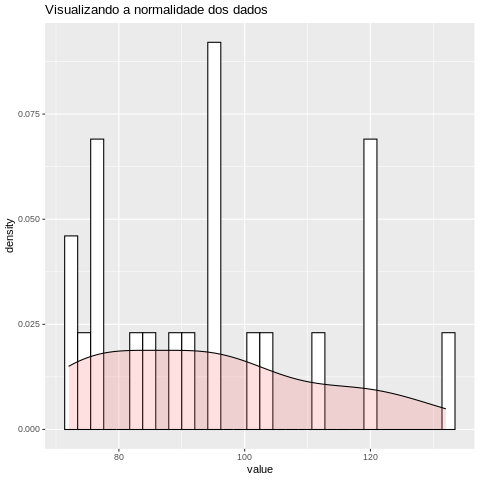

In [160]:
%%R
ggplot(exercicio, aes(x=value)) + geom_histogram(aes(y=..density..), colour="black", fill="white")+
 geom_density(alpha=.2, fill="#FF6666") + ggtitle("Visualizando a normalidade dos dados")

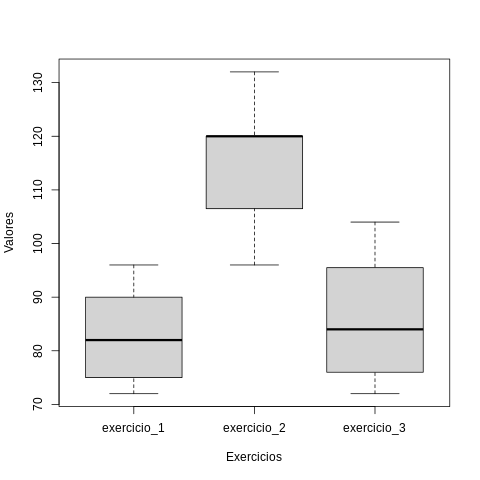

In [161]:
%%R
# verificamos abaixo um grafico (boxplot), que mostra a distribuição dos dados, as medias e os outliers presentes no conjunto
# https://pt.wikipedia.org/wiki/Diagrama_de_caixa
boxplot(value ~  exercicios, data =  exercicio, ylab="Valores", xlab="Exercicios")

## Hipóteses:

H0: Os dados se comportam de forma similar

H1: Pelo menos um dos grupos difere dos demais

In [184]:
%%R
mydata <- exercicio
mydata$ID <- seq.int(nrow(mydata))
mydata$ID <- factor(mydata$ID)
mydata$exercicios <- factor(mydata$exercicios)
str(mydata)

tibble [21 × 3] (S3: tbl_df/tbl/data.frame)
 $ exercicios: Factor w/ 3 levels "exercicio_1",..: 1 2 3 1 2 3 1 2 3 1 ...
 $ value     : num [1:21] 72 120 76 96 120 95 88 132 104 92 ...
 $ ID        : Factor w/ 21 levels "1","2","3","4",..: 1 2 3 4 5 6 7 8 9 10 ...


In [ ]:
%%R
testeFriedman <- friedman.test(value ~ exercicios | ID, data=mydata)

# 8. (1,0 ponto) Use o teste de comparações múltiplas da menor diferença significativa para avaliar os resultados do exercício a seguir. Antes, faça o teste de Kruskall-Wallis.

# 9. (1,0 ponto) Considere os dados abaixo sobre os 574 gols marcados nas 232 partidas em Copas do Mundo de futebol, desde a Copa do Uruguai em 1930 até a Copa do Japão/Coreia em 2002. Os dados foram organizados em classes que representam intervalos de tempo entre gols sucessivos. Utilizando o teste Qui-quadrado verifique aderência ao modelo de Exponencial.

Dica: a distribuição exponencial é usada para descrever intervalos de tempo entre eventos sucessivos e possui a
seguinte expressão: f(x) = λ*e-λx